In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


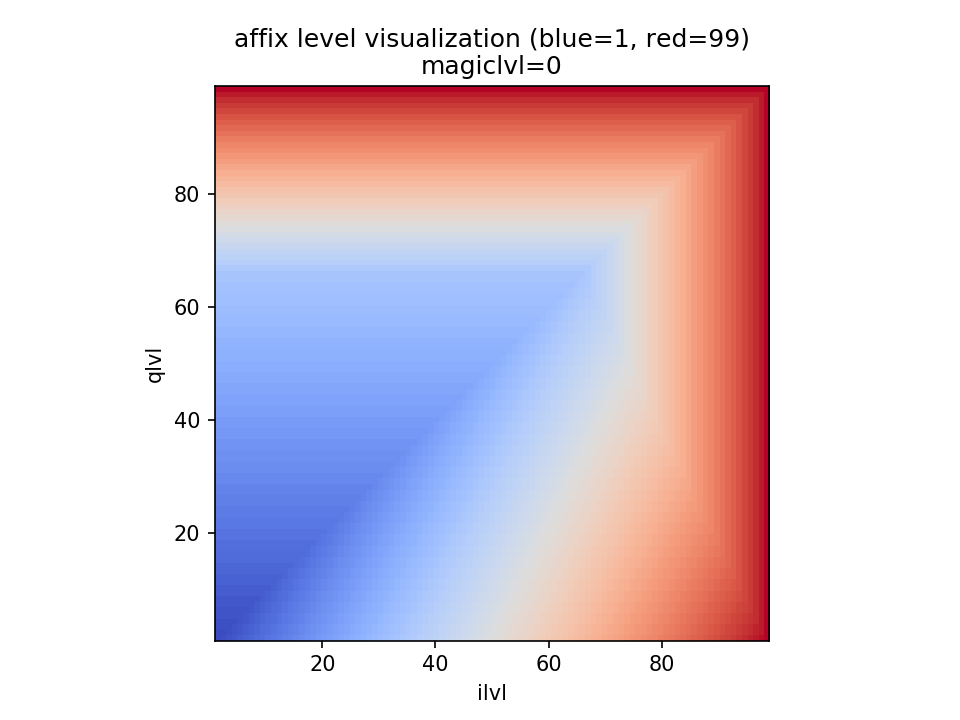

<IPython.core.display.Javascript object>


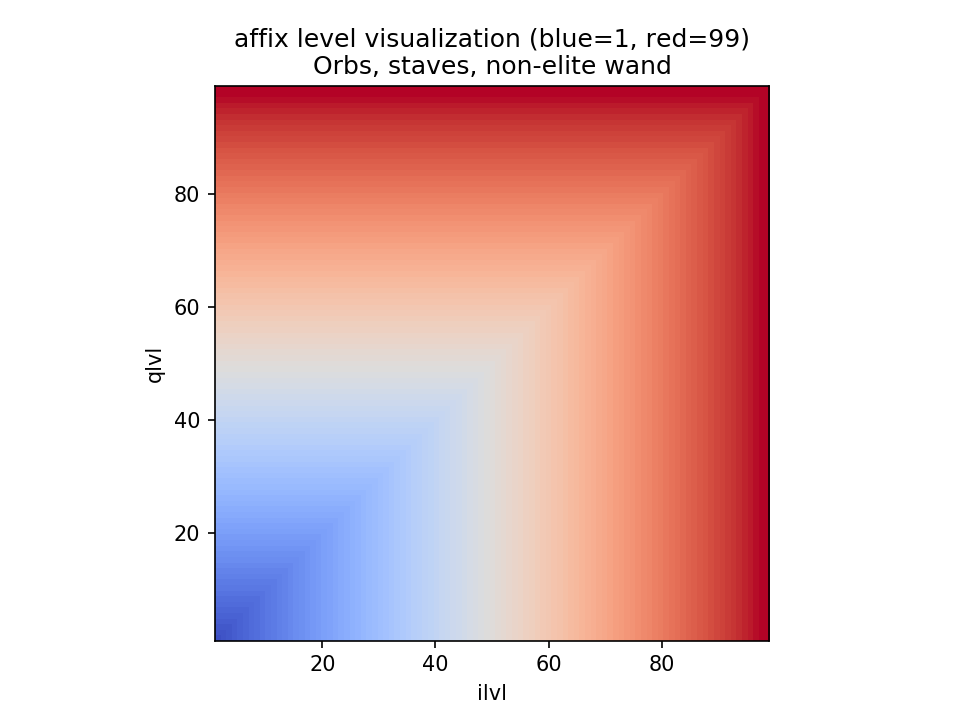

<IPython.core.display.Javascript object>


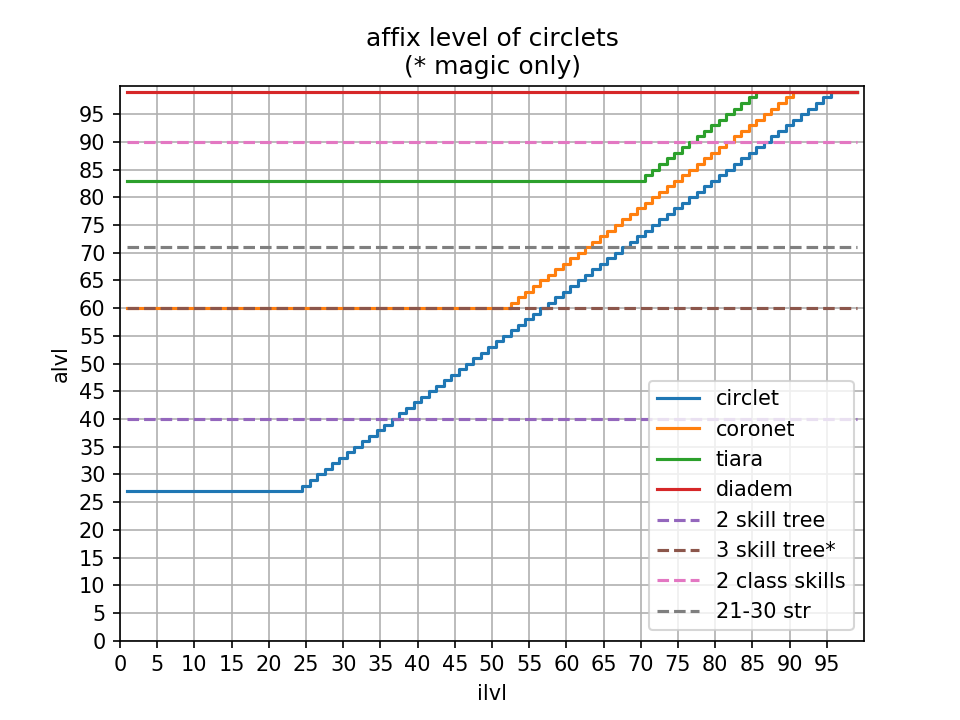

In [2]:
def affix_level(magiclvl, ilvl, qlvl):
    maxiqlvl = np.maximum(ilvl, qlvl)
    if magiclvl > 0:
        return np.minimum(maxiqlvl + magiclvl, 99)
    else:
        sel = maxiqlvl + np.floor(qlvl/2) < 99
        alvl = (2*maxiqlvl - 99)
        alvl[sel] = maxiqlvl[sel] - np.floor(qlvl[sel]/2)
        return np.minimum(alvl, 99)

ilvl = np.array(range(99))+1
qlvl = np.array(range(99))+1
ILVL, QLVL = np.meshgrid(ilvl, qlvl)
ALVL = affix_level(0, ILVL, QLVL)
plt.figure()
plt.imshow(ALVL, cmap='coolwarm', interpolation='nearest', origin='lower', vmin=1, vmax=99, extent=[1,99,1,99])
plt.ylabel('qlvl')
plt.xlabel('ilvl')
plt.title('affix level visualization (blue=1, red=99)\nmagiclvl=0')

ALVL_ML1 = affix_level(1, ILVL, QLVL)
plt.figure()
plt.imshow(ALVL_ML1, cmap='coolwarm', interpolation='nearest', origin='lower', vmin=1, vmax=99, extent=[1,99,1,99])
plt.ylabel('qlvl')
plt.xlabel('ilvl')
plt.title('affix level visualization (blue=1, red=99)\nOrbs, staves, non-elite wand')

ALVL_ML3 = affix_level(3, ILVL, QLVL)[QLVL==24]
plt.figure()
plt.step(ilvl, ALVL_ML3, where='mid')
#plt.ylabel('alvl')
#plt.xlabel('ilvl')
#plt.title('affix level visualization\nCirclet')

ALVL_ML8 = affix_level(8, ILVL, QLVL)[QLVL==52]
plt.step(ilvl, ALVL_ML8, where='mid')
#plt.ylabel('alvl')
#plt.xlabel('ilvl')
#plt.title('affix level visualization\nCoronet')

ALVL_ML13 = affix_level(13, ILVL, QLVL)[QLVL==70]
plt.step(ilvl, ALVL_ML13, where='mid')
#plt.ylabel('alvl')
#plt.xlabel('ilvl')
#plt.title('affix level visualization\nTiara')

ALVL_ML18 = affix_level(18, ILVL, QLVL)[QLVL==85]
plt.step(ilvl, ALVL_ML18, where='mid')
plt.ylabel('alvl')
plt.xlabel('ilvl')
plt.title('affix level of circlets\n(* magic only)')
plt.step(ilvl, 40*np.ones(ilvl.shape), linestyle='dashed')
plt.step(ilvl, 60*np.ones(ilvl.shape), linestyle='dashed')
plt.step(ilvl, 90*np.ones(ilvl.shape), linestyle='dashed')
plt.step(ilvl, 71*np.ones(ilvl.shape), linestyle='dashed')
plt.legend(['circlet', 'coronet', 'tiara', 'diadem', '2 skill tree', '3 skill tree*', '2 class skills', '21-30 str'])
plt.xlim([1,100])
plt.ylim([1,100])
plt.xticks(np.arange(0,100,5))
#plt.xticks(np.arange(0,100,1), minor=True)
plt.yticks(np.arange(0,100,5))
#plt.yticks(np.arange(0,100,1), minor=True)
plt.grid(axis='both')



<IPython.core.display.Javascript object>


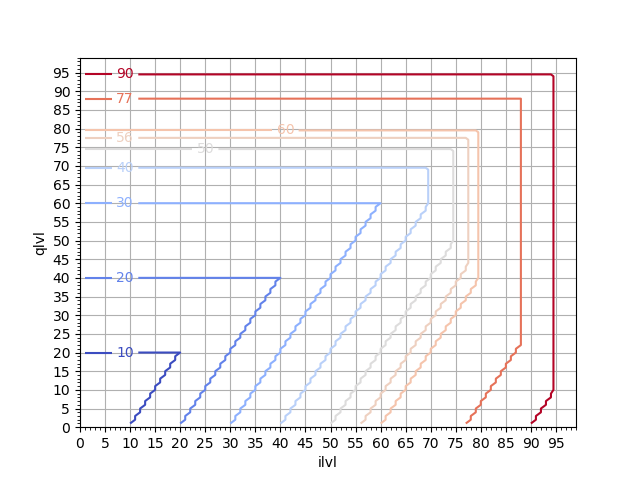

In [106]:
fig, ax = plt.subplots()
CS = ax.contour(ILVL, QLVL, ALVL, cmap='coolwarm', levels=[1, 10, 20, 30, 40, 50, 56, 60, 77, 90, 99])
ax.set_xlabel('ilvl')
ax.set_ylabel('qlvl')
# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%d'
else:
    fmt = '%d'
ax.clabel(CS, CS.levels, fmt=fmt, inline=True, fontsize=10, interpolation=None)
ax.grid(which='major', axis='both')
ax.set_xticks(np.linspace(0,95,20))
ax.set_xticks(range(100), minor=True)
ax.set_yticks(np.linspace(0,95,20))
ax.set_yticks(range(100), minor=True)
plt.show()

Important affix levels
------------------------------


| level | affix         | 
|:------|------------: |
| 10    | Mechanic's   | 
| 40    | +2 skill tree | 
| 46    | of Quickness |
| 50    | +2 skills (orb, pelt)    |
| 50    | Fool's       |
| 56    | Cruel        |
| 56    | Master's     |
| 60    | +3 skill tree |
| 77    | of Vita (36-40) |
| 90    | +2 skills (amu, circ) |
| 91    | of Vita (41-45) |


